<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 5.20: Page 207

a) Program getting the integral from a to b for a function using recursive trapezoid approximation

In [12]:
import numpy as np

def f(x):
  if(x == 0):
    return 1
  else:
    return (np.sin(x)**2)/(x**2)

def Recursive_Trapezoid(x1,x2,fx1,fx2,f,delta):
  dx = x2-x1
  xm = (x1+x2)/2
  fxm = f(xm)
  dx1 = xm-x1
  dx2 = x2-xm
  ErrorNeeded = dx*delta
  
  I1 = dx*(fx1 + fx2)/2
  I2 = (dx1*(fx1+fxm)/2)+(dx2*(fxm+fx2)/2)

  Error = (1/3)*(I2-I1)
  #print(x1,x2,xm,dx,dx1,dx2,fx1,fx2,fxm,ErrorNeeded,Error)
  if(abs(Error) < ErrorNeeded):
    return I2
  else:
    Estimate = Recursive_Trapezoid(x1,xm,fx1,fxm,f,delta) + Recursive_Trapezoid(xm,x2,fxm,fx2,f,delta)
    return Estimate

epsilon = 10E-4
a = 0
b = 10
delta = epsilon/(b-a)
Estimate = Recursive_Trapezoid(a,b,f(a),f(b),f,delta)

print("Integral Estimate:",Estimate)

Integral Estimate: 1.5186616959474484


b) It is a good idea to pass fx1 and fx2 because these values need to be calculated in the previous function anyway, and this will decrease the amount of calls to the function by a large margin

c) Modified program to show where the integrands are

Integral Estimate: 1.5186616959474484


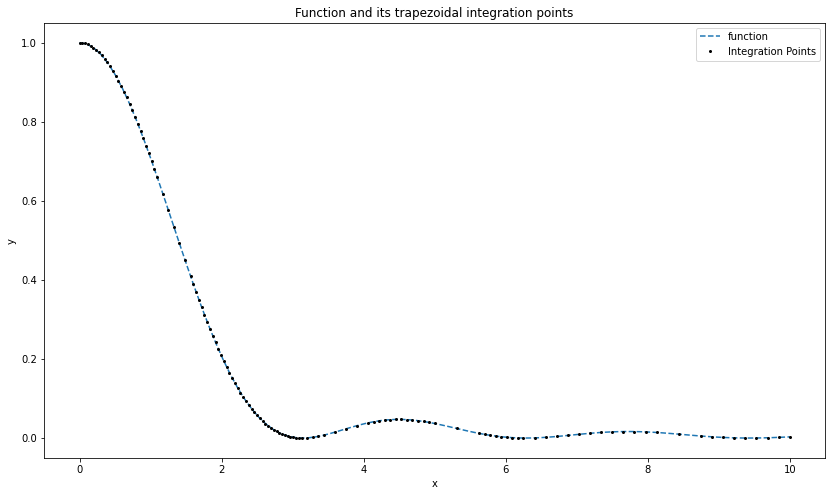

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  if(x == 0):
    return 1
  else:
    return (np.sin(x)**2)/(x**2)

def Recursive_Trapezoid(x1,x2,fx1,fx2,f,delta):
  dx = x2-x1
  xm = (x1+x2)/2
  fxm = f(xm)
  dx1 = xm-x1
  dx2 = x2-xm
  ErrorNeeded = dx*delta
  
  I1 = dx*(fx1 + fx2)/2
  I2 = (dx1*(fx1+fxm)/2)+(dx2*(fxm+fx2)/2)

  Error = (1/3)*(I2-I1)
  #print(x1,x2,xm,dx,dx1,dx2,fx1,fx2,fxm,ErrorNeeded,Error)
  if(abs(Error) < ErrorNeeded):
    points = np.array([x1,xm,x2])
    return I2,points
  else:
    v1,points1 = Recursive_Trapezoid(x1,xm,fx1,fxm,f,delta)
    v2,points2 = Recursive_Trapezoid(xm,x2,fxm,fx2,f,delta)
    Estimate = v1 + v2
    points = np.concatenate((points1,points2))
    return Estimate, points

epsilon = 10E-4
a = 0
b = 10
delta = epsilon/(b-a)
Estimate, Ipoints = Recursive_Trapezoid(a,b,f(a),f(b),f,delta)
Ipointsx = np.unique(Ipoints)

print("Integral Estimate:",Estimate)

x = np.linspace(a,b,100)
y = np.empty(len(x))
i = 0
for val in x:
  y[i] = f(val)
  i += 1

Ipointsy = np.empty(len(Ipointsx))
i = 0
for val in Ipointsx:
  Ipointsy[i] = f(val)
  i += 1

plt.figure(figsize=(14, 8))
plt.plot(x,y,"--",label="function")
plt.plot(Ipointsx,Ipointsy,"ko",label="Integration Points",ms=2)
plt.legend()
plt.title("Function and its trapezoidal integration points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

2) 6.16: Page 274

a) Prove the equation:

![picture](https://drive.google.com/uc?export=view&id=1DmQDqUX0az7cFVvknO8VmHdNyXhXjnHF)

b) Program calculating r

In [40]:
import scipy.optimize as opt

# Constants Needed
G = 6.674E-11 
M = 5.974E24
m = 7.348E22
R = 3.844E8
w = 2.662E-6

# Function we are trying to = 0 for the above constants
# Takes r, returns f(r)
def f(r):
  return (G*M/(r**2))-(G*m/((R-r)**2))-((w**2)*r)

# Values to test for
a = 1E3
b = 3.8E8

# scipy.optimize.brentq finds the roots of a function (where the function = 0)
# for the variable r, using f(r) between a and b find where f(r) = 0
# Returns that value
# (Tried the secant method but couldn't get it to work in time)
r = opt.brentq(lambda r: f(r), a, b)

print("Value of r=","{:e}".format(r))

Value of r= 3.260451e+08


3) Double Pendulum:

In [ ]:
# Was not quite able to get to this before the deadline